## Project Test a Perceptual Phenomenon
This project uses descriptive statistics and a statistical test to analyze the Stroop effect, a classic result of experimental psychology. 

### Background Information

In psychology, the Stroop effect is a demonstration of interference in the reaction time of a task. When the name of a color (e.g., "blue", "green", or "red") is printed in a color that is not denoted by the name (e.g., the word "red" printed in blue ink instead of red ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color. The effect is named after John Ridley Stroop, who first published the effect in English in 1935.[1] The effect had previously been published in Germany in 1929.[2][3][4] The original paper has been one of the most cited papers in the history of experimental psychology, leading to more than 700 replications.[4] The effect has been used to create a psychological test (Stroop test) that is widely used in clinical practice and investigation.

### Project Details

This project poses the following questions. Calculating descriptive statistics and conducting a statistical test will get us the answers.

<b> 1 - What is our independent variable? What is our dependent variable? </b>

The independent variable is which type of words (congruent or incongruent) the participant has to read.
 
The dependent variable is the speed it takes for the participant to read the words. 


<b> 2 - What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices. </b>

An appropriate hypothesis is to see whether the congruency of the words has an effect on the reading of them out loud. To test this hypothesis, a two-tailed test is in order: 
 
 
Ho - Null Hypothesis: ( $\mu_{c}$ - $\mu_{i}$) = 0 ) 
 
Ha - Alternative Hypothesis: ( $\mu_{c}$ - $\mu_{i}$) ≠ 0 )

In laymens terms, we are testing whether the difference in speed between reading the congruent type and the incongruent type is statistically different. 

<b> 3 - Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. </b>

Using some simple commands in the pandas package, we can get descriptive statistics.

In [42]:
# necessary package to load data type
import pandas as pd
stroop_df = pd.read_csv('/Users/RichardJamesLopez/Dropbox/project_test_a_perceptual_phenomenon/stroopdata.csv')

The number of results for each condition ($n_{c}$, $n_{i}$):

In [43]:
print (stroop_df.count())

Congruent      24
Incongruent    24
dtype: int64


The median result for each condition:

In [44]:
print (stroop_df.median())

Congruent      14.3565
Incongruent    21.0175
dtype: float64


The mean of the results for each condition ($\mu_{c}$, $\mu_{i}$):

In [45]:
print (stroop_df.mean())

Congruent      14.051125
Incongruent    22.015917
dtype: float64


The standard deviation of the results for each condition (s$_c$, s$_i$):

In [46]:
print (stroop_df.std())

Congruent      3.559358
Incongruent    4.797057
dtype: float64


The standard deviation of the incongruent distribution indicates there may be a statistical difference. Before we test this though, let's visualize it.  

<b>4 - Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Using these libraries, we will be able to understand the data more by plotting out visualizaitons.

In [47]:
# necessary packages
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [48]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [49]:
# load in variables
con_mean    = stroop_df['Congruent'].mean()
incon_mean  = stroop_df['Incongruent'].mean()

In [50]:
# choose color scheme
blue  = sns.xkcd_rgb["blue"]
green = sns.xkcd_rgb["faded green"]
muted_blue  = sns.xkcd_rgb["muted blue"]
muted_green = sns.xkcd_rgb["muted green"]

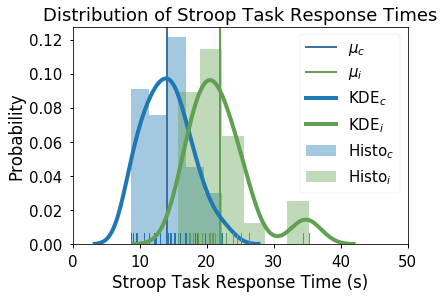

In [51]:
# Add a vertical line representing the mean of the results for the 'Congruent' condition.
plt.axvline(x=con_mean, linewidth=2, color=muted_blue, label='$\mu_{c}$')
plt.annotate(str("%.2f" % con_mean), xy=(8, 0.13), xytext=(8, 0.13), color=muted_blue)

# Add a vertical line representing the mean of the results for the 'Incongruent' condition.
plt.axvline(x=incon_mean, linewidth=2, color=muted_green, label='$\mu_{i}$')
plt.annotate(str("%.2f" % incon_mean), xy=(16, 0.13), xytext=(16, 0.13), color=muted_green)

# Plot the distributions for both conditions with histograms, Kernel Density Estimates and rugs.
ax = sns.distplot(stroop_df['Congruent'], 
                  label='Histo$_c$', 
                  kde=True, rug=True, kde_kws={"lw" : 4, "label": "KDE$_c$"})
ax = sns.distplot(stroop_df['Incongruent'], 
                  label='Histo$_i$',
                  color= muted_green,
                  kde=True, rug=True, ax=ax, kde_kws={"lw" : 4, "label": "KDE$_i$", "color" : muted_green})

# Title and label the plot.
ax.set_title('Distribution of Stroop Task Response Times')
ax.set_xlabel('Stroop Task Response Time (s)')
ax.set_ylabel('Probability')
plt.xlim([0,50])
plt.legend()
plt.show()

Based on the plot above, there are two distinct distributions based on whether the participant recited congruent or incongruent set. This may indicate that there is a statically significant difference between the two conditions. However, this cannot be gleamed from just a visualization. We need to conduct an inferential statistics test to decide if there is any statistical significance. 

Furthermore, there appears to be a set of outliers on the right side of the incongruent values that creates another peak. As an aside, we can visualize the data with or without the outliers.

<u>Setting aside the Outliers</u>

In [52]:
outlier_indices = stroop_df['Incongruent'] > 30
outliers = stroop_df['Incongruent'][outlier_indices]
without_outliers = stroop_df['Incongruent'][outlier_indices == False]

Incongruent Condition outlier results in standard deviations from the mean (when calculated w/ the outliers):

In [53]:
print ((outliers - stroop_df['Incongruent'].mean()) / stroop_df['Incongruent'].std())

14    2.759834
19    2.558252
Name: Incongruent, dtype: float64


Incongruent Condition outlier results in standard deviations from the mean (when calculated w/o the outliers):

In [54]:
print ((outliers - without_outliers.mean()) / without_outliers.std())

14    5.004890
19    4.668767
Name: Incongruent, dtype: float64


The values above represent how far the outliers are from the mean of the Incongruent Condition distribution. They are first calculated when the outliers are included and then calculated using mean and standard deviation values calculated without the outliers.

These results are still inconculsive considering that a distance of less than 3σ suggests they are not outliers. Eventhough a distance greater than 4.5σ suggests that they may be.

Just to be complete, it is worth repeating the visualization with and without the outliers 

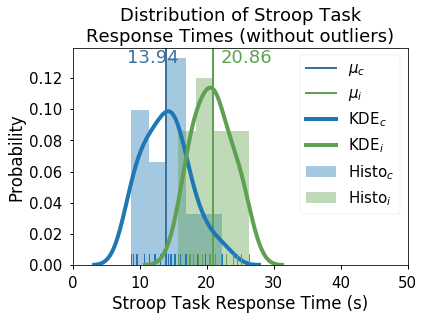

In [55]:
stroop_df_without_outliers = stroop_df[outlier_indices == False]

con_mean    = stroop_df_without_outliers['Congruent'].mean()
incon_mean  = stroop_df_without_outliers['Incongruent'].mean()

# Add a vertical line representing the mean of the results for the 'Congruent' condition.
plt.axvline(x=con_mean, linewidth=2, color=muted_blue, label='$\mu_{c}$')
plt.annotate(str("%.2f" % con_mean), xy=(8, 0.13), xytext=(8, 0.13), color=muted_blue)

# Add a vertical line representing the mean of the results for the 'Incongruent' condition.
plt.axvline(x=incon_mean, linewidth=2, color=muted_green, label='$\mu_{i}$')
plt.annotate(str("%.2f" % incon_mean), xy=(22, 0.13), xytext=(22, 0.13), color=muted_green)

# Plot the distributions for both conditions with histograms, Kernel Density Estimates and rugs.
ax = sns.distplot(stroop_df_without_outliers['Congruent'], 
                  label='Histo$_c$', 
                  kde=True, rug=True, kde_kws={"lw" : 4, "label": "KDE$_c$"})
ax = sns.distplot(stroop_df_without_outliers['Incongruent'], 
                  label='Histo$_i$',
                  color= muted_green,
                  kde=True, rug=True, ax=ax, kde_kws={"lw" : 4, "label": "KDE$_i$", "color" : muted_green})

# Title and label the plot.
ax.set_title('Distribution of Stroop Task\nResponse Times (without outliers)')
ax.set_xlabel('Stroop Task Response Time (s)')
ax.set_ylabel('Probability')
plt.xlim([0,50])
plt.legend()
plt.show()

Now this makes a little more sense. Without the outliers, the incongruent distribution has a single peak and, yet, still lies to the right of the congruent distribution. 

However, to get to the heart of the matter, we need to run a test to see if the effect is more than just visual. 

<b>5 - Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?</b>


To run an experiment that will test the statistically significant difference between the two sets of results, it makes sense to run a two-tailed dependent test. 

<u>Testing our Null Hypothesis</u>



In [56]:
# useful packages
import math
from scipy.stats import t
import scipy.stats as stats

Before we run the test, we need a t-critical value. This can be found in the following link for the t-table. https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg

Find the appropriate t-critical value by looking up the degrees of freedom(23) row in the 95% confidence interval column. Note, this 95% confidence level means we have an alpha of 5%. 

In [57]:
t_critical = 2.069

Using the t_critical value that has been set above, we can write a function that will print a statement for the following statistics:
- Test Decision
- p-value
- Cohen's D
- Confidence Interval

In [58]:
def dependent_measures_t_test(data_a, data_b, alpha, t_critical):
    mean_a = data_a.mean()
    mean_b = data_b.mean()
    difference_of_means = mean_a - mean_b

    difference_between_the_results = data_a - data_b

    sample_size = len(data_a)
    df = sample_size - 1

    std_of_the_differences = difference_between_the_results.std()

    t_stat = difference_of_means / (std_of_the_differences / math.sqrt(sample_size))
    p_value = t.pdf(t_stat, df)
    
    reject_the_null = p_value < alpha

    print ("Should we accept the alternative hypothesis? " + str(reject_the_null))
    print ("The p value for a t statistic of " + str(abs(t_stat)) + " with a df of " + str(df) + ": " + str(p_value))
    
    cohens_d = difference_of_means / std_of_the_differences
    
    print ("Cohen's D for this test is: " + str(cohens_d))
    
    ci_lower_boundary = difference_of_means - t_critical * (std_of_the_differences / math.sqrt(sample_size))
    ci_upper_boundary = difference_of_means + t_critical * (std_of_the_differences / math.sqrt(sample_size))
                                                            
    print ((("The confidence interval for a t-critical value of " + str(t_critical) + " is: " +
            "(" + str(ci_lower_boundary) + ", " + str(ci_upper_boundary) + ")")))

In [59]:
dependent_measures_t_test(stroop_df['Congruent'], stroop_df['Incongruent'], 0.025, t_critical)

Should we accept the alternative hypothesis? True
The p value for a t statistic of 8.020706944109955 with a df of 23: 4.39399581591e-08
Cohen's D for this test is: -1.637219949122262
The confidence interval for a t-critical value of 2.069 is: (-10.019367912023052, -5.910215421310278)


Intrepreting the code and the summary we really need to look at two numbers when deciding to reject the null or failing to reject it - the t-statistic and the confidence interval. 

Since 
- the t-statistic is 8.020706944109955, and 
- the t-critical value is +/- 2.069

the t-statistic is larger than the t-critical value and so we put it outside the 95% range (in the critical zone). This essentially means that the chance of error in saying the means are different is very low. With 95% confidence we can assert that we cannot accept the face that reciting the color for congruent sets of words is the same as reciting the color for incongruent sets.  


<b><u>Reflections</u></b>

These results support a simple intuition that words that have likeness are easy to describe. 

If I am looking at a word that spells "blue" and the word has the color of blue itself, this likeness is convenient. 

However, if I am looking at a word that spells "green" and the word has the color of pink, there is no likeness and this disimilarity throws you off. The word spelled "green" (with the color pink) is not so intuitive and forces your mental cognition to work a little harder to decouple the messages. If you asked to recite the word, it would be "green". If you are asked which color the word is, the answer is "pink". This may force a participant to take a couple of extra seconds to answer these questions (when compared to the convenient "blue-blue" pairing). 

Furthermore, this intuition was informed by my own experience of having taken the test with both congurent and incongruent sets. I took more than a full 20 seconds with the incongruent test. 

<b>6 - Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!</b>


The effect tested generally regard neural stimulation. Stroop concluded that when you force the brain process conflicting associations, there are additional tasks like sorting, comparmentalize, etc, that will require more mental stimulation.$^1$ In this regard, the participant takes a longer amount of time to complete the test because the reading and decoding of the color was more stiumulating than just forcing on decoding of the color. 


If I had to imagine a more everyday effect, I imagine there are a lot of quotidian tasks that are harder because of other simulatanous effects. For example, if I am trying to write a letter in English and someone is singing a song in another language that I know, say Mandarin. I'd gather that I would get distracted and take longer to write the letter. 

A popular follow-up to this study is the Simon Effect. This corroborates the general idea that if you have conflicting tasks happening at the same time, it will take you long to mentally process.  His experiment had lights and arrows pointing at various angles to show the two different stimuli affected speed.$^2$


<b>References:</b>

Research:

1-http://psychclassics.yorku.ca/Stroop/

2-http://www.tandfonline.com/doi/abs/10.1080/00140136308930679#aHR0cDovL3d3dy50YW5kZm9ubGluZS5jb20vZG9pL3BkZi8xMC4xMDgwLzAwMTQwMTM2MzA4OTMwNjc5P25lZWRBY2Nlc3M9dHJ1ZUBAQDA=

Other projects/sites:

https://rpubs.com/georgeliu/nanop1

https://github.com/j450h1/P1-Test-a-Perceptual-Phenomenon/blob/master/Project%20Questions.ipynb

https://github.com/eminnett/da-nanodegree-test-a-perceptual-phenomenon/blob/master/test_a_perceptual_phenomenon.ipynb



Documentation: 

https://pandas.pydata.org/pandas-docs/stable/basics.html

https://seaborn.pydata.org/generated/seaborn.distplot.html

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html

<b>Contact:</b>

Feedback is welcome and corrections are always an improvement to the product. richardjameslopez[at]gmail

